In [1]:
# Expand the Width of the Cells to a ratio of 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# **Grover's Algorithm and Quantum Search with N = 2, 3, 4 Qubits**

## **Summer School on Quantum Computing: Software for Near Term Quantum Devices 2020**
### **(August 31, 2020 - September 4, 2020)**

<br>

#### **Professors/Evaluators:**
* [**Diego Porras Torre**](mailto:d.porras@iff.csic.es)
* [**Juan José García Ripolli**](mailto:juanjose.garcia.ripoll@csic.es)

#### **Students (Team 4):**
* [**Gustavo del Val Garcia**]()
* [**Lucía Vílchez Estévez**]()
* [**María Hita Pérez**]()
* [**Rúben André Barreiro**](mailto:ruben.andre.letra.barreito@gmail.com)

<br>

##### **Notes:**
* This [**Jupyter Notebook**](https://jupyter.org/) was initially provided by [**Diego Porras Torre**](mailto:d.porras@iff.csic.es) and [**Juan José García Ripolli**](mailto:juanjose.garcia.ripoll@csic.es), during the **Summer School on Quantum Computing: Software for Near Term Quantum Devices 2020**, offered by [**UIMP (Universidad Internacional Menéndez Pelayo)**](http://www.uimp.es/) and [**CSIC (Consejo Superior de Investigaciones Científicas)**](https://www.csic.es/) and modified by the students assigned to this **Quantum Computing Project** ([**Rúben André Barreiro**](mailto:ruben.andre.letra.barreito@gmail.com)).
* The **Graphical Illustrations/Animations** are courtesy of [**Rúben André Barreiro**](mailto:ruben.andre.letra.barreito@gmail.com), as a part of [**Learning Quantum Computing**](https://learning-quantum-computing.github.io/), and [**Tutorial on the Grover Algorithm, by IBM's Qiskit**](https://qiskit.org/textbook/ch-algorithms/grover.html).
* The **Scripts**, written in **Python Programming Language**, used to draw the **Animations** of the [**Bloch Spheres**](https://en.wikipedia.org/wiki/Bloch_sphere) in [**QuTiP**](http://qutip.org/), are also courtesy of [**Rúben André Barreiro**](mailto:ruben.andre.letra.barreito@gmail.com), as a part of [**Learning Quantum Computing**](https://learning-quantum-computing.github.io/).

## **Introduction**

This excercise deals with the implementation of [**Grover's Algorithm**](https://en.wikipedia.org/wiki/Grover%27s_algorithm) with [**Qiskit**](https://qiskit.org/). We will consider $n = 2, 3, 4$ **Qubits**, which allows to deal with $2^n$ **Entries/States**.

A nice explanation of the **Algorithm** and its implementation with [**Qiskit**](https://qiskit.org/) can be found here:

* [**https://qiskit.org/textbook/ch-algorithms/grover.html**](https://qiskit.org/textbook/ch-algorithms/grover.html)

<br>

This notebook builds on the documentation above. It has moslty a pedagogical value:

* It helps clarifying the main working principles of the **Algorithm**, as well as the difficulties found when implementing **Oracle** and **Inversion Operators** in practice. 

<br>

The [**Grover's Algorithm**](https://en.wikipedia.org/wiki/Grover%27s_algorithm) will be also explained in [**Diego Porras**](mailto:d.porras@iff.csic.es)' lecture on the first school day. This **Algorithm** relies on the application of the **Grover's Operator**:

* $ G = (2 |\psi\rangle \langle \psi | - I) O $,

    where $O$ is the so-called **Oracle Operator**, and $(2 |\psi\rangle \langle \psi | - I)$ is the **Inversion Operator**.

The joint action of those **Operators** lead to the [**Amplitude Amplification Effect**](https://en.wikipedia.org/wiki/Amplitude_amplification) that is the basis for **Quantum Search**.

To fully understand the **Algorithm**, you can either wait for [**Diego**](mailto:d.porras@iff.csic.es)'s talk, or read the [**Qiskit**](https://qiskit.org/) documentation above. The basis of the **Algorithm** is the **Multi-Qubit** [**Controlled-Z Gate**](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CZGate.html#qiskit.circuit.library.CZGate), which is somehow independent of the details of [**Grover's Algorithm**](https://en.wikipedia.org/wiki/Grover%27s_algorithm).

## **Environment's Setup**

In [2]:
# Update, the Conda's version, if necessary
!conda update -n base conda --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [3]:
# Install other useful Libraries for Quantum Information Science,
# the QuTiP Framework, in this case, based on Python Programming Language
!conda install qutip --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [4]:
# Import the matplotlib Library
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Import the NumPy and Math Libraries,
# based on Python Programming Language
import numpy as np
import math

In [6]:
# Import some basic Modules from Qiskit Library and configuring account
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [7]:
# Import some basic Visualization/Plot Modules/Tools from Qiskit Library
from qiskit.tools.visualization import plot_histogram

In [8]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print() instead.
from qiskit_textbook.tools import array_to_latex

## **The Multi-Qubit Controlled-Z Gate**

The backbone of [**Grover's Algorithm**](https://en.wikipedia.org/wiki/Grover%27s_algorithm) is the **Multi-Qubit** [**Controlled-Z Gate**](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CZGate.html#qiskit.circuit.library.CZGate).

In order to understand this **Controlled Quantum Gate** well, let's introduce other important **Quantum Gates**, enumerated as the following:

* [**X-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#xgate)**:**
    * The [**X-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#xgate) is represented by the [**Pauli-X Matrix**](https://en.wikipedia.org/wiki/Quantum_logic_gate#Pauli-X_gate):
    
    <br>
    <br>
    
        * $ Pauli-X = \sigma_{1} = \sigma_{x} = R_{X_{(\pi)}} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0⟩⟨1|+|1⟩⟨0| $
    
    <br>
    
    * Acts on **only (one) single** **Qubit**.
    
    <br>
    
    * **Rotates** (or **flips**) the **Qubit** **180° (π radians) C.C.W. Counter Clockwise** around the **X-Axis** of the **Bloch Sphere**.
    
    <br>

    * It's represented graphically, in **Quantum Systems** and **Quantum Circuits**, as demonstrated following:
    
    <br>
        
        <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/schemes/logic-gates/quantum-logic-gates/PNGs/quantum-pauli-x-gate-1.png" alt="X-Gate" width="25%">
    
    <br>

    * It's equivalent to the [**Classical NOT Gate (Inverter)**](https://en.wikipedia.org/wiki/Inverter_(logic_gate)), when applied to the **Classical Computational Basis** (i.e., $ |0⟩ $ and $ |1⟩ $):

    <br>
        
        <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/schemes/logic-gates/classical-logic-gates/PNGs/classical-not-gate-1.png" alt="Classical NOT Gate (Inverser)" width="35%">
    
    <br>

    * To see the effect of this [**X-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#xgate) has on a **Qubit**, we simply multiply the **Qubit**’s **statevector** by the [**Pauli-X Matrix**](https://en.wikipedia.org/wiki/Quantum_logic_gate#Pauli-X_gate) representing the [**X-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#xgate).
    
    <br>
    
    * We can see that the [**X-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#xgate) switches the **Amplitudes** of the states $ |0⟩ $ and $ |1⟩ $:
    
    <br>
    
        * $ X|0⟩ = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \times \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1⟩ $
        
    <br>
    
        * $ X|1⟩ = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \times \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0⟩ $
    
    <br>
    <br>
    
    * And, in that cases, [**X-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#xgate) have the following behaviour, in the [**Bloch Sphere**](https://en.wikipedia.org/wiki/Bloch_sphere) and in **Histogram** representing the **Probabilities of Measurement** (i.e., the **Square Value of the Modulus of the Amplitudes**) of the **Qubit**:
        
        <br>
        
        * $ |0⟩ \rightarrow |1⟩ $:
            
            <br>

            <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/animations/bloch_sphere_animation_pauli_x_quantum_logic_gate_operator_from_ground_state.gif" alt="Behavior of X-Gate applied to the Computational Basis |0⟩, in the Bloch Sphere" width="25%">
            <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/animations/histogram_animation_pauli_x_quantum_logic_gate_operator_from_ground_state.gif" alt="Behavior of X-Gate applied to the Computational Basis |0⟩, in the Amplitudes' Histogram" width="50%">
            
        <br>
        
        * $ |1⟩ \rightarrow |0⟩ $:
            
            <br>

            <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/animations/bloch_sphere_animation_pauli_x_quantum_logic_gate_operator_from_excited_state.gif" alt="Behavior of X-Gate applied to the Computational Basis |1⟩" width="25%">
            <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/animations/histogram_animation_pauli_x_quantum_logic_gate_operator_from_excited_state.gif" alt="Behavior of X-Gate applied to the Computational Basis |1⟩, in the Amplitudes' Histogram" width="50%">

* [**Z-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#zgate)**:**
    * The [**Z-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#zgate) is represented by the [**Pauli-Z Matrix**](https://en.wikipedia.org/wiki/Quantum_logic_gate#Pauli-Z_('%22%60UNIQ--postMath-00000028-QINU%60%22')_gate): 
    
    * $ Pauli-Z = \sigma_{3} = \sigma_{z} = R_{Z_{(\pi)}} = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = |0⟩⟨0|−|1⟩⟨1| $
    
    <br>
    
    * Acts on **only (one) single** **Qubit**.
    
    <br>
    
    * **Rotates** (or **flips**) the **Qubit** **180° (π radians) C.C.W. Counter Clockwise** around the **Z-Axis** of the **Bloch Sphere**.
    
    <br>
    
    * It's a **"special case"** of a **Phase Shift Quantum Gate**, with $ \phi = \pi $;
    
    <br>

    * It's represented graphically, in **Quantum Systems** and **Quantum Circuits**, as demonstrated following:
    
    <br>
        
        <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/schemes/logic-gates/quantum-logic-gates/PNGs/quantum-pauli-z-gate-1.png" alt="Z-Gate" width="25%">
    
    <br>
    
    * To see the effect of this [**Z-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#1.2-The-Y-&-Z-gates--) has on a **Qubit**, we simply multiply the **Qubit**’s **statevector** by the [**Pauli-Z Matrix**](https://en.wikipedia.org/wiki/Quantum_logic_gate#Pauli-Z_('%22%60UNIQ--postMath-00000028-QINU%60%22')_gate) representing the [**Z-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#1.2-The-Y-&-Z-gates--).
    
    <br>
    
    * The [**Z-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#1.2-The-Y-&-Z-gates--) have practically no effect when applied to the **Classical Computational Basis** $ |0⟩ $:
    
    <br>
    
        * $ |0⟩ \rightarrow |0⟩ $:
        
            <br>
        
            * $ Z|0⟩ = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \times \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0⟩ $ 
       
    <br>
    <br>
    
    * But, the [**Z-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#1.2-The-Y-&-Z-gates--) have a slightly different effect when applied to the **Classical Computational Basis** $ |1⟩ $:
    
    <br>
    
        * $ |1⟩ \rightarrow -|1⟩ $:
        
            <br>
        
            * $ Z \times |1⟩ = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \times \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ -1 \end{bmatrix} = -|1⟩ $ 
        
        <br>
        
        * $ -|1⟩ \rightarrow |1⟩ $:
        
            <br>
        
            * $ Z \times -|1⟩ = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \times \begin{bmatrix} 0 \\ -1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1⟩ $ 
    
    <br>
    <br>
    
    * We can see that the [**Z-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#1.2-The-Y-&-Z-gates--) switches the **Phases** of the states $ |+⟩ $, $ |+i⟩ $, $ |-⟩ $ and $ |-i⟩ $:
    
    <br>
    
        * $ Z|+⟩ = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \times \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} = |-⟩ $
        
    <br>
    
        * $ Z|+i⟩ = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \times \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{i}{\sqrt{2}} \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{-i}{\sqrt{2}}\end{bmatrix} = |-i⟩ $
        
    <br>
    
        * $ Z|-⟩ = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \times \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} = |+⟩ $
        
    <br>
    
        * $ Z|-i⟩ = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \times \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{i}{\sqrt{2}} \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{i}{\sqrt{2}} \end{bmatrix} = |+i⟩ $
    
    <br>
    <br>
    
    * And, in that cases, [**Z-Gate**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#1.2-The-Y-&-Z-gates--) have the following behaviour, in the [**Bloch Sphere**](https://en.wikipedia.org/wiki/Bloch_sphere) of the **Qubit**:
        
        <br>
        
        * $ |+⟩ \rightarrow |-⟩ $:
            
            <br>

            <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/animations/bloch_sphere_animation_pauli_z_quantum_logic_gate_operator_from_plus_state.gif" alt="Behavior of Z-Gate applied to the Hadamard Basis |+⟩, in the Bloch Sphere" width="25%">
            
        <br>
        
        * $ |+i⟩ \rightarrow |-i⟩ $:
            
            <br>

            <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/animations/bloch_sphere_animation_pauli_z_quantum_logic_gate_operator_from_img_state.gif" alt="Behavior of Z-Gate applied to the Hadamard Basis |+i⟩" width="25%">
            
        <br>
        
        * $ |-⟩ \rightarrow |+⟩ $:
            
            <br>

            <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/animations/bloch_sphere_animation_pauli_z_quantum_logic_gate_operator_from_minus_state.gif" alt="Behavior of Z-Gate applied to the Hadamard Basis |-⟩" width="25%">
            
        <br>
        
        * $ |-i⟩ \rightarrow |+i⟩ $:
            
            <br>

            <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/animations/bloch_sphere_animation_pauli_z_quantum_logic_gate_operator_from_neg_img_state.gif" alt="Behavior of X-Gate applied to the Computational Basis |-i⟩" width="25%">

This is a **Quantum Gate** that carries out the following **Quantum Operation**:

* $ U^{[n]}_{mqZ} = -2 |1 1 1 1 \dots 1 \rangle \langle 1 1 1 1 \dots 1 | + \mathbf{I} $

It is generally a quite complex task to build such a gate. We will see below examples with $n = 2$, $3$, $4$ **Qubits**. In the [**Quantum Computation and Quantum Information**](https://github.com/rubenandrebarreiro/summer-school-on-quantum-computing-software-for-near-term-quantum-devices-2020/blob/master/others/pdfs/books/quantum-computation-and-quantum-information-nielsen-and-chuang-book.pdf) book by [**Michael A. Nielsen**](http://michaelnielsen.org/) and [**Isaac L. Chuang**](https://en.wikipedia.org/wiki/Isaac_Chuang), **page 184**, they show a general procedure to build this **Multi-Qubit Gate** in general with [**Toffoli Gates**](https://en.wikipedia.org/wiki/Toffoli_gate) and additional [**Ancilla**](https://en.wikipedia.org/wiki/Ancilla_bit) **(extra) Qubits**. Here we will avoid the use of extra **Qubits**.

Note that $U^{[n]}_{mqZ}$ multiplies a **Quantum State** conditioned to all **Qubits** being in state $|1\rangle$. This operation is not trivial at all and it is difficult to scale to **Many-Qubits**. 

Remember that [**Grover's Algorithm**](https://en.wikipedia.org/wiki/Grover%27s_algorithm) does require in fact a slightly different operator to be used as **Inversion Operator**:

* $ U_{inv} = -2 |0 0 0 \dots 0 \rangle \langle 0 0 0 \dots 0 | + \mathbf{I} $

<br>

We can easliy express $U_{inv}$ in terms of $U_{mqZ}$ by using [**X-Gates**](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#xgate), which just **swap** $|0\rangle$ and $|1\rangle$:

* $ U_{inv} = X^{\otimes n} U_{mqZ} X^{\otimes n} $

The cases with $n = 2$, $3$ are quite simple. The case of $n = 2$ is the usual [**Controlled-Z Gate**](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CZGate.html#qiskit.circuit.library.CZGate). Let us define a function that implements this **Quantum Circuit**:

In [9]:
def cz(circuit, qr):
    
    circuit.h(qr[1])
    
    circuit.cx(qr[0],qr[1])
    
    circuit.h(qr[1])

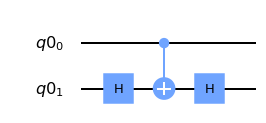

In [10]:
# Create a Classical Register for 2 Bits (Classical Bits), with a Total of 2 Possible Processed States
qr2 = QuantumRegister(2)

czCircuit = QuantumCircuit(qr2)

cz(czCircuit,qr2)

czCircuit.draw(output="mpl")

In [11]:
def ccz(circuit,qr):
    
    circuit.h(qr[2])
    
    # CCX is the Toffoli gate 
    circuit.ccx(qr[0], qr[1], qr[2])
    
    circuit.h(qr[2])

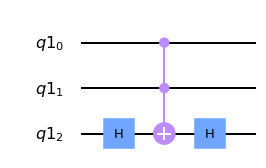

In [12]:
qr3 = QuantumRegister(3)

cczCircuit = QuantumCircuit(qr3)

ccz(cczCircuit,qr3)

cczCircuit.draw(output="mpl")

The case $n = 4$ is more difficult. We will use an implementation that only uses [**Controlled-NOT Gates**]() and [**Phase Gates**]():

In [13]:
def cccz(circuit,qr):
    pi = math.pi
    
    circuit.cu1(pi/4,qr[0],qr[3])
    circuit.cx(qr[0], qr[1])
    circuit.cu1(-pi/4, qr[1],qr[3])
    circuit.cx(qr[0], qr[1])
    circuit.cu1(pi/4, qr[1],qr[3])
    circuit.cx(qr[1], qr[2])
    circuit.cu1(-pi/4, qr[2],qr[3])
    circuit.cx(qr[0], qr[2])
    circuit.cu1(pi/4, qr[2],qr[3])
    circuit.cx(qr[1], qr[2])
    circuit.cu1(-pi/4, qr[2],qr[3])
    circuit.cx(qr[0], qr[2])
    circuit.cu1(pi/4, qr[2],qr[3])

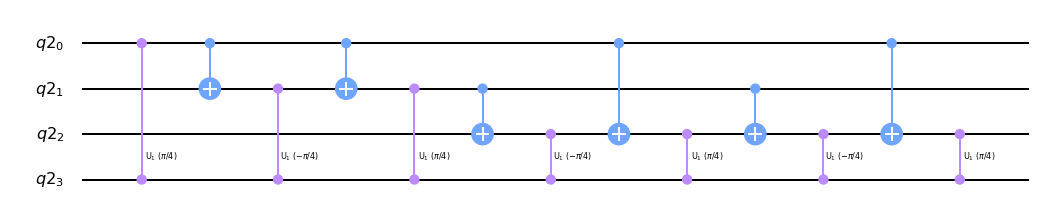

In [14]:
qr4 = QuantumRegister(4)

ccczCircuit = QuantumCircuit(qr4)

cccz(ccczCircuit,qr4)

ccczCircuit.draw(output="mpl")

Below we define a **Multi-Qubit** [**Controlled-Z Gate**]() for $N = 2, 3, 4$ **ions**. The function also counts the number of **Control Qubits**.

In [15]:
def n_controlled_Z(circuit, qr):
    
    # Implement a Z-Gate with multiple controls
    if (len(qr) > 4):
        raise ValueError('The Controlled-Z with more than 3 Control-Qubits is not implemented!!!')
        
    # This is the case n = 2 (1 control + 1 target Qubit)
    elif (len(qr) == 2):
        cz(circuit,qr)
        
    # This is the case n = 3 (2 control + 1 target Qubit)
    elif (len(qr) == 3):
        ccz(circuit,qr)
        
    # This is the case n = 4 (3 control + 1 target Qubit)
    elif (len(qr) == 4):
        cccz(circuit,qr)

### **Excercise 1**
Check out that the above definitions really implement the **Multi-Qubit** [**Controlled-Z Gate**](). In the cases $n = 2, 3$, you can show it explicitly with pen and paper, or just by checking with [**Qiskit**](https://qiskit.org/) how the function acts on different input states. The case $n = 4$ is more complicated and we recommend that you just check it numerically.

### **Resolution for Exercise 1**

In [16]:
# Getting the Backend for the Unitary Representation of the Controlled-Z Gate
# (i.e., the Quantum State represented as an Unitary Matrix)
backend = Aer.get_backend('unitary_simulator')
unitaryCZ = execute(czCircuit,backend).result().get_unitary()
unitaryCCZ = execute(cczCircuit,backend).result().get_unitary()
unitaryCCCZ = execute(ccczCircuit,backend).result().get_unitary()

For the **Multi-Qubit** [**Controlled-Z Gate**]() for $n = 2, 3, 4$, we have the following **Unitary Matrices**:

In [17]:
array_to_latex(unitaryCZ, pretext="\\text{CZ (Controlled-Z) = }\n")
array_to_latex(unitaryCCZ, pretext="\\text{CCZ (Controlled-Controlled-Z) = }\n")
array_to_latex(unitaryCCCZ, pretext="\\text{CCCZ (Controlled-Controlled-Controlled-Z) = }\n")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In fact, we can generalize a **Multi-Qubit** [**Controlled-Z Gate**](), with $n = k$, as a **Unitary Matrix**, with the following configuration:

<br>

* $ Multi-Qubit \ Controlled-Z = \begin{bmatrix} 1 & 0 & 0 & \dots & 0 & 0 \\ 0 & 1 & 0 & \dots & 0 & 0 \\ \vdots & \vdots & \vdots & \ddots & \ddots & \vdots \\ 0 & 0 & 0 & \dots & 1 & 0 \\ 0 & 0 & 0 & \dots & 0 & -1 \end{bmatrix} $ ,

    with **dimension** of $ 2^{k} $ (i.e., a $ 2^{k} \times 2^{k} $ **Square Matrix**).

In this **Unitary Matrix**, denoted by $ U $, the **elements/entries** $ U_{2^{k}-1,\ 2^{k}-1} $, $ U_{2^{k}-1,\ 2^{k}} $, $ U_{2^{k},\ 2^{k}-1} $ and $ U_{2^{k},\ 2^{k}} $ are represented by the [**Pauli-Z Matrix**]():

* $ Pauli-Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $

And, the remaining **elements/entries** are equivalent to the [**Identity Matrix**]():

* $ I_{2^{k}-2} = \begin{bmatrix} 1 & 0 & \dots & 0 \\ 0 & 1 & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & 1 \end{bmatrix} $

This **Multi-Qubit** [**Controlled-Z Gate**]() acts as the following:

<br>

* If all the **Control-Qubits** (i.e., the **elements/entries** represented by the **Identity Diagonal** from $ U_{1,\ 1} $ to $ U_{2^{k}-2,\ 2^{k}-2} $) are set to $ |1 \rangle $, then it applies the [**Pauli-Z Gate**]() to the **Target-Qubit** (i.e., the **elements/entries** represented by the **Diagonal** from $ U_{2^{k}-2,\ 2^{k}-2} $ to $ U_{2^{k},\ 2^{k}} $);

<br>

* Otherwise, the **Target-Qubit** have its **state** (or, its **Phase**, in this case) unchanged; 

We can have the following **Classical Computational States** configurations for a **Qubit**:

<br>

* $ | 0 \rangle = | \uparrow \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $

<br>

* $ | 1 \rangle = | \downarrow \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $

In order to see the behaviour of the [**Z Gate**](), you can do the following **Multiplication** between the [**Pauli-Z Matrix**]() and the **Statevector** of the **Qubit**, accordingly with previously defined configurations:

<br>

* $ Z| 0 \rangle = Z| \uparrow \rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \times \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = | 0 \rangle $

<br>

* $ Z| 1 \rangle = Z| \downarrow \rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \times \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ -1 \end{bmatrix} = -| 1 \rangle $

<br>

In fact, we can generalize this behaviour, as the following:

<br>

* $ Z| \psi \rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \times \begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} \alpha \\ -\beta \end{bmatrix} $

<br>

Thus, and as expected, even if you have the following situations, the same behaviour happens:

<br>

* $ Z(-| 1 \rangle) = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \times \begin{bmatrix} 0 \\ -1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = | 1 \rangle $

This **Multi-Qubit** [**Controlled-Z Gate**]() with $ n = 2 $ acts as the following:

<br>

* $ | \psi_{a} \rangle = | \psi_{control} \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} $ (**Control-Qubit**)

<br>

* $ | \psi_{b} \rangle = | \psi_{target} \rangle = \begin{bmatrix} \gamma \\ \delta \end{bmatrix} $ (**Target-Qubit**)

<br>

* $ | \psi_{b} \rangle \otimes | \psi_{a} \rangle = | \psi_{target} \rangle \otimes | \psi_{control} \rangle = \begin{bmatrix} \gamma \\ \delta \end{bmatrix} \otimes \begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} \gamma \alpha \\ \gamma \beta \\ \delta \alpha \\ \delta \beta \end{bmatrix} = | \psi_{target} \psi_{control} \rangle = | \psi_{b} \psi_{a} \rangle $

<br>

* $ CZ| \psi_{b} \psi_{a} \rangle = CZ| \psi_{target} \psi_{control} \rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{bmatrix} \times \begin{bmatrix} \gamma \alpha \\ \gamma \beta \\ \delta \alpha \\ \delta \beta \end{bmatrix} = \begin{bmatrix} \gamma \alpha \\ \gamma \beta \\ \delta \alpha \\ -\delta \beta \end{bmatrix} $

<br>

So, for the following configurations, we have the shown behaviour:

* For $ | \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control} \rangle = | 00 \rangle $:

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control} \rangle = | 0 \rangle = \begin{bmatrix} \alpha = 1 \\ \beta = 0 \end{bmatrix} $ (**Control-Qubit**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{target} \rangle = | 0 \rangle = \begin{bmatrix} \gamma = 1 \\ \delta = 0 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CZ| \psi_{b} \psi_{a} \rangle = CZ| \psi_{target} \psi_{control} \rangle = CZ| 00 \rangle = \begin{bmatrix} \gamma \alpha \\ \gamma \beta \\ \delta \alpha \\ -\delta \beta \end{bmatrix} = \begin{bmatrix} 1 \times 1 = 1 \\ 1 \times 0 = 0 \\ 0 \times 1 = 0 \\ 0 \times 0 = 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} = | 00 \rangle $
    
<br>
<br>

* For $ | \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control} \rangle = | 01 \rangle $:

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control} \rangle = | 1 \rangle = \begin{bmatrix} \alpha = 0 \\ \beta = 1 \end{bmatrix} $ (**Control-Qubit**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{target} \rangle = | 0 \rangle = \begin{bmatrix} \gamma = 1 \\ \delta = 0 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CZ| \psi_{b} \psi_{a} \rangle = CZ| \psi_{target} \psi_{control} \rangle = CZ| 01 \rangle = \begin{bmatrix} \gamma \alpha \\ \gamma \beta \\ \delta \alpha \\ -\delta \beta \end{bmatrix} = \begin{bmatrix} 1 \times 0 = 0 \\ 1 \times 1 = 1 \\ 0 \times 0 = 0 \\ 0 \times 1 = 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} = | 01 \rangle $
    
<br>
<br>

* For $ | \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control} \rangle = | 10 \rangle $:

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control} \rangle = | 0 \rangle = \begin{bmatrix} \alpha = 1 \\ \beta = 0 \end{bmatrix} $ (**Control-Qubit**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{target} \rangle = | 1 \rangle = \begin{bmatrix} \gamma = 0 \\ \delta = 1 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CZ| \psi_{b} \psi_{a} \rangle = CZ| \psi_{target} \psi_{control} \rangle = CZ| 10 \rangle = \begin{bmatrix} \gamma \alpha \\ \gamma \beta \\ \delta \alpha \\ -\delta \beta \end{bmatrix} = \begin{bmatrix} 0 \times 1 = 0 \\ 0 \times 0 = 0 \\ 1 \times 1 = 1 \\ -1 \times 0 = 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} = | 10 \rangle $
    
<br>
<br>

* For $ | \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control} \rangle = | 11 \rangle $ (**Case #1**):

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control} \rangle = | 1 \rangle = \begin{bmatrix} \alpha = 0 \\ \beta = 1 \end{bmatrix} $ (**Control-Qubit**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{target} \rangle = | 1 \rangle = \begin{bmatrix} \gamma = 0 \\ \delta = 1 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CZ| \psi_{b} \psi_{a} \rangle = CZ| \psi_{target} \psi_{control} \rangle = CZ| 11 \rangle = \begin{bmatrix} \gamma \alpha \\ \gamma \beta \\ \delta \alpha \\ -\delta \beta \end{bmatrix} = \begin{bmatrix} 0 \times 0 = 0 \\ 0 \times 1 = 0 \\ 1 \times 0 = 0 \\ -1 \times 1 = -1 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ -1 \end{bmatrix} = -| 11 \rangle $
    
<br>
<br>

* For $ | \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control} \rangle = | 11 \rangle $ (**Case #2**):

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control} \rangle = -| 1 \rangle = \begin{bmatrix} \alpha = 0 \\ \beta = -1 \end{bmatrix} $ (**Control-Qubit**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{target} \rangle = -| 1 \rangle = \begin{bmatrix} \gamma = 0 \\ \delta = -1 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CZ| \psi_{b} \psi_{a} \rangle = CZ| \psi_{target} \psi_{control} \rangle = CZ| 11 \rangle = \begin{bmatrix} \gamma \alpha \\ \gamma \beta \\ \delta \alpha \\ -\delta \beta \end{bmatrix} = \begin{bmatrix} 0 \times 0 = 0 \\ 0 \times -1 = 0 \\ -1 \times 0 = 0 \\ -1 \times -1 \times -1 = -1 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ -1 \end{bmatrix} = -| 11 \rangle $
    
<br>
<br>

* For $ | \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control} \rangle = -| 11 \rangle $ (**Case #1**):

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control} \rangle = -| 1 \rangle = \begin{bmatrix} \alpha = 0 \\ \beta = -1 \end{bmatrix} $ (**Control-Qubit**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{target} \rangle = | 1 \rangle = \begin{bmatrix} \gamma = 0 \\ \delta = 1 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CZ| \psi_{b} \psi_{a} \rangle = CZ| \psi_{target} \psi_{control} \rangle = CZ(-| 11 \rangle) = \begin{bmatrix} \gamma \alpha \\ \gamma \beta \\ \delta \alpha \\ -\delta \beta \end{bmatrix} = \begin{bmatrix} 0 \times 0 = 0 \\ 0 \times -1 = 0 \\ 1 \times 0 = 0 \\ -1 \times -1 = 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = | 11 \rangle $
    
<br>
<br>

* For $ | \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control} \rangle = -| 11 \rangle $ (**Case #2**):

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control} \rangle = | 1 \rangle = \begin{bmatrix} \alpha = 0 \\ \beta = 1 \end{bmatrix} $ (**Control-Qubit**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{target} \rangle = -| 1 \rangle = \begin{bmatrix} \gamma = 0 \\ \delta = -1 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CZ| \psi_{b} \psi_{a} \rangle = CZ| \psi_{target} \psi_{control} \rangle = CZ(-| 11 \rangle) = \begin{bmatrix} \gamma \alpha \\ \gamma \beta \\ \delta \alpha \\ -\delta \beta \end{bmatrix} = \begin{bmatrix} 0 \times 0 = 0 \\ 0 \times 1 = 0 \\ -1 \times 0 = 0 \\ -1 \times -1 \times 1 = 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = | 11 \rangle $

This **Multi-Qubit** [**Controlled-Z Gate**]() with $ n = 3 $ acts as the following:

<br>

* $ | \psi_{a} \rangle = | \psi_{control-1} \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} $ (**Control-Qubit #1**)

<br>

* $ | \psi_{b} \rangle = | \psi_{control-2} \rangle = \begin{bmatrix} \gamma \\ \delta \end{bmatrix} $ (**Control-Qubit #2**)

<br>

* $ | \psi_{c} \rangle = | \psi_{target} \rangle = \begin{bmatrix} \epsilon \\ \zeta \end{bmatrix} $ (**Target-Qubit**)

<br>

* $ | \psi_{c} \rangle \otimes | \psi_{b} \rangle \otimes | \psi_{a} \rangle = | \psi_{target} \rangle \otimes | \psi_{control-2} \rangle \otimes | \psi_{control-1} \rangle = \begin{bmatrix} \epsilon \\ \zeta \end{bmatrix} \otimes \begin{bmatrix} \gamma \\ \delta \end{bmatrix} \otimes \begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} \epsilon \\ \zeta \end{bmatrix} \otimes \begin{bmatrix} \gamma \alpha \\ \gamma \beta \\ \delta \alpha \\ \delta \beta \end{bmatrix} = \begin{bmatrix} \epsilon \gamma \alpha \\ \epsilon \gamma \beta \\ \epsilon \delta \alpha \\ \epsilon \delta \beta \\ \zeta \gamma \alpha \\ \zeta \gamma \beta \\ \zeta \delta \alpha \\ \zeta \delta \beta \end{bmatrix} = | \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = | \psi_{c} \psi_{b} \psi_{a} \rangle $

<br>

* $ CCZ| \psi_{c} \psi_{b} \psi_{a} \rangle = CCZ| \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & -1 \end{bmatrix} \times \begin{bmatrix} \epsilon \gamma \alpha \\ \epsilon \gamma \beta \\ \epsilon \delta \alpha \\ \epsilon \delta \beta \\ \zeta \gamma \alpha \\ \zeta \gamma \beta \\ \zeta \delta \alpha \\ \zeta \delta \beta \end{bmatrix} = \begin{bmatrix} \epsilon \gamma \alpha \\ \epsilon \gamma \beta \\ \epsilon \delta \alpha \\ \epsilon \delta \beta \\ \zeta \gamma \alpha \\ \zeta \gamma \beta \\ \zeta \delta \alpha \\ -\zeta \delta \beta \end{bmatrix} $

<br>

So, for the following configurations, we have the shown behaviour:

* For $ | \psi_{c} \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = | 000 \rangle $:

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control-1} \rangle = \begin{bmatrix} \alpha = 1 \\ \beta = 0 \end{bmatrix} $ (**Control-Qubit #1**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{control-2} \rangle = \begin{bmatrix} \gamma = 1 \\ \delta = 0 \end{bmatrix} $ (**Control-Qubit #2**)

    <br>

    * $ | \psi_{c} \rangle = | \psi_{target} \rangle = \begin{bmatrix} \epsilon = 1 \\ \zeta = 0 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CCZ| \psi{c} \psi_{b} \psi_{a} \rangle = CCZ| \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = CZ| 000 \rangle = \begin{bmatrix} \epsilon \gamma \alpha \\ \epsilon \gamma \beta \\ \epsilon \delta \alpha \\ \epsilon \delta \beta \\ \zeta \gamma \alpha \\ \zeta \gamma \beta \\ \zeta \delta \alpha \\ -\zeta \delta \beta \end{bmatrix} = \begin{bmatrix} 1 \times 1 \times 1 = 1 \\ 1 \times 1 \times 0 = 0 \\ 1 \times 0 \times 1 = 0 \\ 1 \times 0 \times 0 = 0 \\ 0 \times 1 \times 1 = 0 \\ 0 \times 1 \times 1 = 0 \\ 0 \times 1 \times 0 = 0 \\ -0 \times 0 \times 0 = 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} = | 000 \rangle $
    
<br>
<br>

* For $ | \psi_{c} \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = | 001 \rangle $:

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control-1} \rangle = \begin{bmatrix} \alpha = 0 \\ \beta = 1 \end{bmatrix} $ (**Control-Qubit #1**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{control-2} \rangle = \begin{bmatrix} \gamma = 1 \\ \delta = 0 \end{bmatrix} $ (**Control-Qubit #2**)

    <br>

    * $ | \psi_{c} \rangle = | \psi_{target} \rangle = \begin{bmatrix} \epsilon = 1 \\ \zeta = 0 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CCZ| \psi{c} \psi_{b} \psi_{a} \rangle = CCZ| \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = CZ| 001 \rangle = \begin{bmatrix} \epsilon \gamma \alpha \\ \epsilon \gamma \beta \\ \epsilon \delta \alpha \\ \epsilon \delta \beta \\ \zeta \gamma \alpha \\ \zeta \gamma \beta \\ \zeta \delta \alpha \\ -\zeta \delta \beta \end{bmatrix} = \begin{bmatrix} 1 \times 1 \times 0 = 0 \\ 1 \times 1 \times 1 = 1 \\ 1 \times 0 \times 0 = 0 \\ 1 \times 0 \times 1 = 0 \\ 0 \times 1 \times 0 = 0 \\ 0 \times 1 \times 1 = 0 \\ 0 \times 1 \times 0 = 0 \\ -0 \times 0 \times 1 = 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} = | 001 \rangle $
    
<br>
<br>

* For $ | \psi_{c} \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = | 010 \rangle $:

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control-1} \rangle = \begin{bmatrix} \alpha = 1 \\ \beta = 0 \end{bmatrix} $ (**Control-Qubit #1**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{control-2} \rangle = \begin{bmatrix} \gamma = 0 \\ \delta = 1 \end{bmatrix} $ (**Control-Qubit #2**)

    <br>

    * $ | \psi_{c} \rangle = | \psi_{target} \rangle = \begin{bmatrix} \epsilon = 1 \\ \zeta = 0 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CCZ| \psi{c} \psi_{b} \psi_{a} \rangle = CCZ| \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = CZ| 010 \rangle = \begin{bmatrix} \epsilon \gamma \alpha \\ \epsilon \gamma \beta \\ \epsilon \delta \alpha \\ \epsilon \delta \beta \\ \zeta \gamma \alpha \\ \zeta \gamma \beta \\ \zeta \delta \alpha \\ -\zeta \delta \beta \end{bmatrix} = \begin{bmatrix} 1 \times 0 \times 1 = 0 \\ 1 \times 0 \times 0 = 0 \\ 1 \times 1 \times 1 = 1 \\ 1 \times 1 \times 0 = 0 \\ 0 \times 0 \times 1 = 0 \\ 0 \times 0 \times 0 = 0 \\ 0 \times 1 \times 1 = 0 \\ -0 \times 1 \times 0 = 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} = | 010 \rangle $
    
<br>
<br>

* For $ | \psi_{c} \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = | 011 \rangle $:

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control-1} \rangle = \begin{bmatrix} \alpha = 0 \\ \beta = 1 \end{bmatrix} $ (**Control-Qubit #1**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{control-2} \rangle = \begin{bmatrix} \gamma = 0 \\ \delta = 1 \end{bmatrix} $ (**Control-Qubit #2**)

    <br>

    * $ | \psi_{c} \rangle = | \psi_{target} \rangle = \begin{bmatrix} \epsilon = 1 \\ \zeta = 0 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CCZ| \psi{c} \psi_{b} \psi_{a} \rangle = CCZ| \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = CZ| 011 \rangle = \begin{bmatrix} \epsilon \gamma \alpha \\ \epsilon \gamma \beta \\ \epsilon \delta \alpha \\ \epsilon \delta \beta \\ \zeta \gamma \alpha \\ \zeta \gamma \beta \\ \zeta \delta \alpha \\ -\zeta \delta \beta \end{bmatrix} = \begin{bmatrix} 1 \times 0 \times 0 = 0 \\ 1 \times 0 \times 1 = 0 \\ 1 \times 1 \times 0 = 0 \\ 1 \times 1 \times 1 = 1 \\ 0 \times 0 \times 0 = 0 \\ 0 \times 0 \times 1 = 0 \\ 0 \times 1 \times 0 = 0 \\ -0 \times 1 \times 1 = 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} = | 011 \rangle $
    
<br>
<br>

* For $ | \psi_{c} \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = | 100 \rangle $:

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control-1} \rangle = \begin{bmatrix} \alpha = 1 \\ \beta = 0 \end{bmatrix} $ (**Control-Qubit #1**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{control-2} \rangle = \begin{bmatrix} \gamma = 1 \\ \delta = 0 \end{bmatrix} $ (**Control-Qubit #2**)

    <br>

    * $ | \psi_{c} \rangle = | \psi_{target} \rangle = \begin{bmatrix} \epsilon = 0 \\ \zeta = 1 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CCZ| \psi{c} \psi_{b} \psi_{a} \rangle = CCZ| \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = CZ| 100 \rangle = \begin{bmatrix} \epsilon \gamma \alpha \\ \epsilon \gamma \beta \\ \epsilon \delta \alpha \\ \epsilon \delta \beta \\ \zeta \gamma \alpha \\ \zeta \gamma \beta \\ \zeta \delta \alpha \\ -\zeta \delta \beta \end{bmatrix} = \begin{bmatrix} 0 \times 1 \times 1 = 0 \\ 0 \times 1 \times 0 = 0 \\ 0 \times 0 \times 1 = 0 \\ 0 \times 0 \times 0 = 0 \\ 1 \times 1 \times 1 = 1 \\ 1 \times 1 \times 0 = 0 \\ 1 \times 0 \times 1 = 0 \\ -1 \times 0 \times 0 = 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} = | 100 \rangle $
    
<br>
<br>

* For $ | \psi_{c} \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = | 101 \rangle $:

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control-1} \rangle = \begin{bmatrix} \alpha = 0 \\ \beta = 1 \end{bmatrix} $ (**Control-Qubit #1**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{control-2} \rangle = \begin{bmatrix} \gamma = 1 \\ \delta = 0 \end{bmatrix} $ (**Control-Qubit #2**)

    <br>

    * $ | \psi_{c} \rangle = | \psi_{target} \rangle = \begin{bmatrix} \epsilon = 0 \\ \zeta = 1 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CCZ| \psi{c} \psi_{b} \psi_{a} \rangle = CCZ| \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = CZ| 101 \rangle = \begin{bmatrix} \epsilon \gamma \alpha \\ \epsilon \gamma \beta \\ \epsilon \delta \alpha \\ \epsilon \delta \beta \\ \zeta \gamma \alpha \\ \zeta \gamma \beta \\ \zeta \delta \alpha \\ -\zeta \delta \beta \end{bmatrix} = \begin{bmatrix} 0 \times 1 \times 0 = 0 \\ 0 \times 1 \times 1 = 0 \\ 0 \times 0 \times 0 = 0 \\ 0 \times 0 \times 1 = 0 \\ 1 \times 1 \times 0 = 0 \\ 1 \times 1 \times 1 = 1 \\ 1 \times 0 \times 0 = 0 \\ -1 \times 0 \times 1 = 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} = | 101 \rangle $
    
<br>
<br>

* For $ | \psi_{c} \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = | 110 \rangle $:

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control-1} \rangle = \begin{bmatrix} \alpha = 1 \\ \beta = 0 \end{bmatrix} $ (**Control-Qubit #1**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{control-2} \rangle = \begin{bmatrix} \gamma = 0 \\ \delta = 1 \end{bmatrix} $ (**Control-Qubit #2**)

    <br>

    * $ | \psi_{c} \rangle = | \psi_{target} \rangle = \begin{bmatrix} \epsilon = 0 \\ \zeta = 1 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CCZ| \psi{c} \psi_{b} \psi_{a} \rangle = CCZ| \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = CZ| 110 \rangle = \begin{bmatrix} \epsilon \gamma \alpha \\ \epsilon \gamma \beta \\ \epsilon \delta \alpha \\ \epsilon \delta \beta \\ \zeta \gamma \alpha \\ \zeta \gamma \beta \\ \zeta \delta \alpha \\ -\zeta \delta \beta \end{bmatrix} = \begin{bmatrix} 0 \times 0 \times 1 = 0 \\ 0 \times 0 \times 0 = 0 \\ 0 \times 1 \times 1 = 0 \\ 0 \times 1 \times 0 = 0 \\ 1 \times 0 \times 1 = 0 \\ 1 \times 0 \times 0 = 0 \\ 1 \times 1 \times 1 = 1 \\ -1 \times 1 \times 0 = 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} = | 110 \rangle $
    
<br>
<br>

* For $ | \psi_{c} \psi_{b} \psi_{a} \rangle = | \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = | 111 \rangle $:

    <br>

    * $ | \psi_{a} \rangle = | \psi_{control-1} \rangle = \begin{bmatrix} \alpha = 0 \\ \beta = 1 \end{bmatrix} $ (**Control-Qubit #1**)

    <br>

    * $ | \psi_{b} \rangle = | \psi_{control-2} \rangle = \begin{bmatrix} \gamma = 0 \\ \delta = 1 \end{bmatrix} $ (**Control-Qubit #2**)

    <br>

    * $ | \psi_{c} \rangle = | \psi_{target} \rangle = \begin{bmatrix} \epsilon = 0 \\ \zeta = 1 \end{bmatrix} $ (**Target-Qubit**)

    <br>

    * $ CCZ| \psi{c} \psi_{b} \psi_{a} \rangle = CCZ| \psi_{target} \psi_{control-2} \psi_{control-1} \rangle = CZ| 111 \rangle = \begin{bmatrix} \epsilon \gamma \alpha \\ \epsilon \gamma \beta \\ \epsilon \delta \alpha \\ \epsilon \delta \beta \\ \zeta \gamma \alpha \\ \zeta \gamma \beta \\ \zeta \delta \alpha \\ -\zeta \delta \beta \end{bmatrix} = \begin{bmatrix} 0 \times 0 \times 0 = 0 \\ 0 \times 0 \times 1 = 0 \\ 0 \times 1 \times 0 = 0 \\ 0 \times 1 \times 1 = 0 \\ 1 \times 0 \times 0 = 0 \\ 1 \times 0 \times 1 = 0 \\ 1 \times 1 \times 0 = 0 \\ -1 \times 1 \times 1 = -1 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ -1 \end{bmatrix} = -| 111 \rangle $

And this it's the **magic** of the **Phase** of a **Qubit**!!!

<head>
<style>
* {
  box-sizing: border-box;
}

.column {
  float: left;
  width: 33.33%;
  padding: 5px;
}

/* Clearfix (clear floats) */
.row::after {
  content: "";
  clear: both;
  display: table;
}
</style>
</head>

<div class="row" style="content: '';clear: both; display: table;">
  <div class="column" style="float: left;width: 20%;padding: 5px;">
    <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/schemes/z-gate-ground-state.png" alt="Behavior of Z-Gate applied to the Ground State (i.e., |0⟩) in the Amplitudes' Histogram" width="100%">
  </div>
  <div class="column" style="float: left;width: 20%;padding: 5px;">
      <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/schemes/z-gate-excited-state-with-positive-amplitude-1.png" alt="Behavior of Z-Gate applied to the Excited State with Positive Amplitude (i.e., |1⟩) in the Amplitudes' Histogram" width="100%">
  </div>
  <div class="column" style="float: left;width: 20%;padding: 5px;">
      <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/schemes/z-gate-excited-state-with-negative-amplitude-1.png" alt="Behavior of Z-Gate applied to the Excited State with Negative Amplitude (i.e., -|1⟩) in the Amplitudes' Histogram" width="100%">
  </div>
  <div class="column" style="float: left;width: 20%;padding: 5px;">
      <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/schemes/z-gate-excited-state-with-positive-amplitude-2.png" alt="Behavior of Z-Gate applied to the Excited State with Positive Amplitude (i.e., |β⟩) in the Amplitudes' Histogram" width="100%">
  </div>
  <div class="column" style="float: left;width: 20%;padding: 5px;">
      <img src="https://learning-quantum-computing.github.io/course/core-2-introduction-to-quantum-computing/week-7-the-fundamentals-of-quantum-computing/assets/images/schemes/z-gate-excited-state-with-negative-amplitude-2.png" alt="Behavior of Z-Gate applied to the Excited State with Negative Amplitude (i.e., -|β⟩) in the Amplitudes' Histogram" width="100%">
  </div>
</div>

## **Implementing the Phase Oracle Circuit**

An **Oracle** is a circuit that **"detects"** one of the **possible states** of the computer (the **searched element**) and changes the **sign** of the **wavefunction**, if the system is that **state**.

This opearation is implemented by the function **"phase_oracle"**, which defines an **Oracle Unitary Transformation** that multiplies a state with $ (-1) $ **sign** only if the state corresponds to a certain database entry $s_1 s_2 s_3 s_4$. 

The state is selected by the argument **"element"**, which is a vector of numbers that defines the databse that the algorithm is searching for (e.g. **element** = $[0,0,1,0]$).

Basically, the function implements the **Unitary Transformation**.

* $ | x \rangle \to | x \rangle \ \ {\rm if } x \neq element $

* $ | x \rangle \to - |x \rangle \ \ {\rm if} x = element $

The **function** relies on the **Multi-Qubit** [**Controlled Z-Gate**]() defined above.

Remember, the latter adds a **sign** as long as $s = |1111\rangle$. What we have to do is just to **flip** **Qubits** depending on the particular **search term** $ s $, apply the **Multi-Qubit Controlled Gate**, then undo the **Spin Flips**:

* $ U_{oracle} = \bigotimes_j X^{1 + s_j} U_{mqZ} \bigotimes_j X^{1 + s_j} $

In [18]:
def phase_oracle(circuit,qr,element):
    
    # Element is an Array that defines the searched Element,
    # for example, Element = [0,1,0,1]
    
    for j,x in enumerate(element):
        if (x == 0):
            circuit.x(qr[j])
    
    circuit.barrier()
    
    n_controlled_Z(circuit,qr) 
    
    circuit.barrier()
    
    for j,x in enumerate(element):
        if (x == 0):
            circuit.x(qr[j])

### **Excercise 2**

Check whether this **function** acts as expected.

**Hint:**

* You could, for example, make some **rotation** on one of the **Qubits** depend on whether the **wavefunction** gets the **right sign** or **not**;

* Thus, when you **measure the final state**, you will detect whether the **right sign** has been added by looking at the **output**;

### **Resolution for Exercise 2**

Let's define an **auxiliary function**, to **"mark"** the desired **State**, we are looking for:

In [19]:
def mark_state(element_test_state, testCircuit):
    
    for qubit_index, element in enumerate(element_test_state):
        if element == 1:
            testCircuit.x(qubit_index)
    
    testCircuit.barrier()

For $ n = 2 $, the previous **function** acts as following:

In [20]:
# Defining some tests, for the Phase Oracle, with n = 2

#element_test_2_states = [0,0]

element_test_2_states = [0,1]

#element_test_2_states = [1,0]

#element_test_2_states = [1,1]

In [21]:
qr2 = QuantumRegister(2)

testFunctionCircuit2 = QuantumCircuit(qr2)

In [22]:
element_test_2_states_binary = ''.join(map(str,element_test_2_states))

In [23]:
print("The Marked State is: |{}⟩".format(element_test_2_states_binary))

The Marked State is: |01⟩


In [24]:
element_test_2_states.reverse()

In [25]:
mark_state(element_test_2_states, testFunctionCircuit2)

In [26]:
phase_oracle(testFunctionCircuit2,qr2,element_test_2_states)

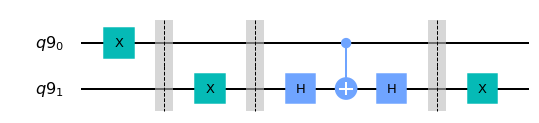

In [27]:
testFunctionCircuit2.draw(output="mpl")

In [28]:
# Getting the Backend for the Statevector Representation
# (i.e., the Quantum State represented as State Vector)
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(testFunctionCircuit2,statevector_backend).result().get_statevector()

In [29]:
array_to_latex(final_state, pretext="\\text{Final State for Marked State (Statevector) = }\n", precision = 1)

<IPython.core.display.Math object>

For $ n = 3 $, the previous **function** acts as following:

In [30]:
# Defining some tests, for the Phase Oracle, with n = 3

#element_test_3_states = [0,0,0]

#element_test_3_states = [0,0,1]

#element_test_3_states = [0,1,0]

element_test_3_states = [0,1,1]

#element_test_3_states = [1,0,0]

#element_test_3_states = [1,0,1]

#element_test_3_states = [1,1,0]

#element_test_3_states = [1,1,1]

In [31]:
qr3 = QuantumRegister(3)

testFunctionCircuit3 = QuantumCircuit(qr3)

In [32]:
element_test_3_states_binary = ''.join(map(str,element_test_3_states))

In [33]:
print("The Marked State is: |{}⟩".format(element_test_3_states_binary))

The Marked State is: |011⟩


In [34]:
element_test_3_states.reverse()

In [35]:
mark_state(element_test_3_states, testFunctionCircuit3)

In [36]:
phase_oracle(testFunctionCircuit3,qr3,element_test_3_states)

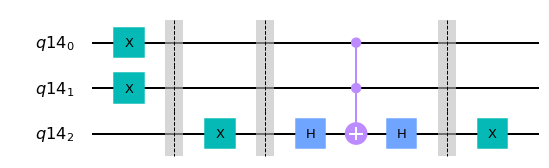

In [37]:
testFunctionCircuit3.draw(output="mpl")

In [38]:
# Getting the Backend for the Statevector Representation
# (i.e., the Quantum State represented as State Vector)
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(testFunctionCircuit3,statevector_backend).result().get_statevector()

In [39]:
array_to_latex(final_state, pretext="\\text{Final State for Marked State (Statevector) = }\n", precision = 1)

<IPython.core.display.Math object>

For $ n = 4 $, the previous **function** acts as following:

In [40]:
# Defining some tests, for the Phase Oracle, with n = 4

#element_test_4_states = [0,0,0,0]

#element_test_4_states = [0,0,0,1]

#element_test_4_states = [0,0,1,0]

#element_test_4_states = [0,0,1,1]

#element_test_4_states = [0,1,0,0]

#element_test_4_states = [0,1,0,1]

#element_test_4_states = [0,1,1,0]

#element_test_4_states = [0,1,1,1]

#element_test_4_states = [1,0,0,0]

#element_test_4_states = [1,0,0,1]

element_test_4_states = [1,0,1,0]

#element_test_4_states = [1,0,1,1]

#element_test_4_states = [1,1,0,0]

#element_test_4_states = [1,1,0,1]

#element_test_4_states = [1,1,1,0]

#element_test_4_states = [1,1,1,1]

In [41]:
qr4 = QuantumRegister(4)

testFunctionCircuit4 = QuantumCircuit(qr4)

In [42]:
element_test_4_states_binary = ''.join(map(str,element_test_4_states))

In [43]:
print("The Marked State is: |{}⟩".format(element_test_4_states_binary))

The Marked State is: |1010⟩


In [44]:
element_test_4_states.reverse()

In [45]:
mark_state(element_test_4_states, testFunctionCircuit4)

In [46]:
phase_oracle(testFunctionCircuit4,qr4,element_test_4_states)

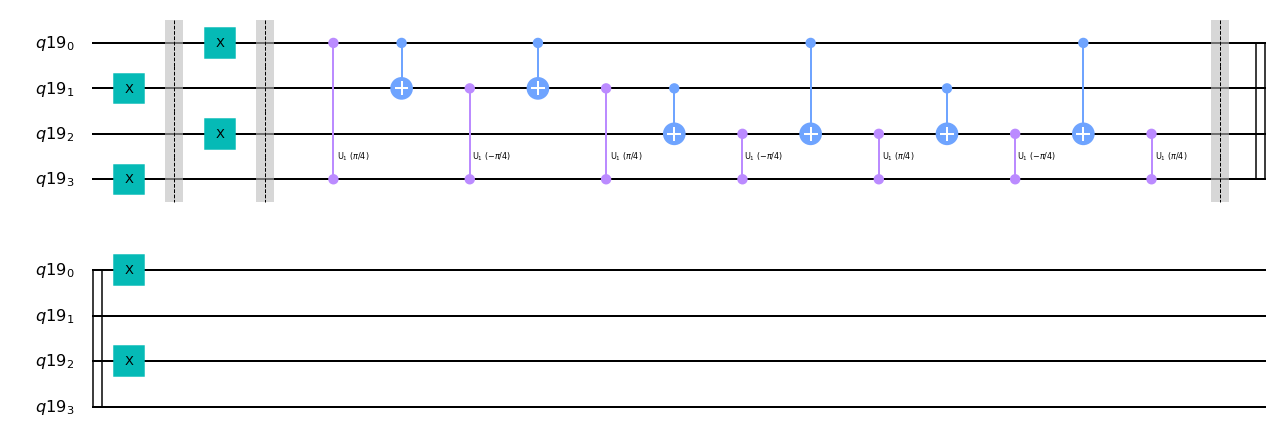

In [47]:
testFunctionCircuit4.draw(output="mpl")

In [48]:
# Getting the Backend for the Statevector Representation
# (i.e., the Quantum State represented as State Vector)
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(testFunctionCircuit4,statevector_backend).result().get_statevector()

In [49]:
array_to_latex(final_state, pretext="\\text{Final State for Marked State (Statevector) = }\n", precision = 1)

<IPython.core.display.Math object>

## **Implementation of the Inversion Operator**

The function below implements the **Inversion Unitary**, which is the second part of the **Grover Operator**. 
This function is a reflection around the state $|\psi\rangle$, that is defined as:

* $ |\psi\rangle = H^{\otimes n} |0\rangle_1 |0\rangle_2 \dots |0\rangle_n = \frac{1}{\sqrt{2^n}} 
\sum_{s_1,\dots,s_n} |s_1 \rangle \dots  |s_n \rangle $

**Note:**
* See [**Diego**]()'s talk or this [**webpage**](https://qiskit.org/textbook/ch-algorithms/grover.html);

<br>

The inversion is implemented by the following **Unitary**:

* $ U_{inv} = H^{\otimes n} (-2 |00 \dots 00\rangle \langle 00 \dots 00 | + {\mathbf I}) H^{\otimes n} $

<br>

As you can see, it is basically identically to the **Multi-Qubit** [**Controlled-Z Gate**]() that we introduced above.

In [75]:
def inversion_about_average(circuit, qr, n):
    
    # Apply Inversion Operator about the Average step of Grover's Algorithm
    
    circuit.h(qr)
    circuit.x(qr)
    
    n_controlled_Z(circuit, qr)
    
    circuit.x(qr)
    circuit.h(qr)

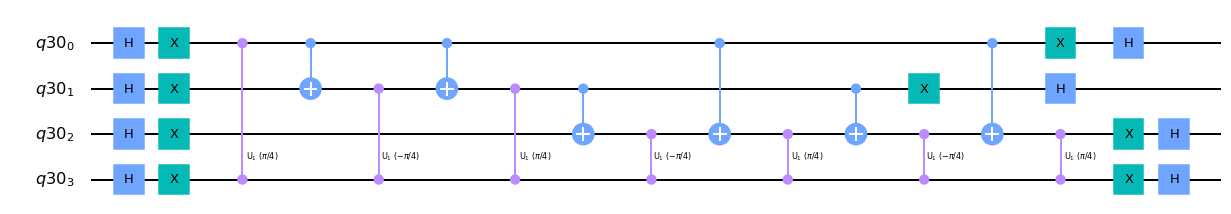

In [76]:
# Now, let's plot the Quantum Circuit for the Quantum Average
qr = QuantumRegister(4)

qAverage = QuantumCircuit(qr)

inversion_about_average(qAverage, qr, 4)

qAverage.draw(output='mpl')

## **Implementation of Grover's Algorithm**

We are in a position now to implement [**Grover's Algorithm**](https://en.wikipedia.org/wiki/Grover%27s_algorithm). We can tune the parameter $R$ = number of applications of the [**Grover**](https://en.wikipedia.org/wiki/Grover%27s_algorithm)**'s Transformation** and $N = 2,3,4$ **Qubits**.

### **Exercise 3** 
Use the subroutines above and write down a **Quantum Circuit** that implements [**Grover's Algorithm**]() with $n = 2, 3, 4$ **Qubits**, and a given number of repetitions $R$, and searched element $= [s_1, s_2, \dots]$

### **Resolution for Exercise 3**

First, let's define an **auxiliary function**, to **put** (or, **"try to put"**) the **States** of all the **Qubits** in **Quantum Superpositions of States**, applying the [**H Gate**]():

In [204]:
def putAllQubitsInQuantumSuperposition(n, quantumCircuit):
    
    quantumCircuit.barrier()
    
    for qubit_index in range(n):
        quantumCircuit.h(qubit_index)
    
    quantumCircuit.barrier()

Now, let's define an **auxiliary function**, to **measure** the **States** of all the **Qubits**:

In [205]:
def measureAllQubits(n, quantumCircuit, quantumRegister, classicalRegister):
    
    quantumCircuit.barrier()
    
    for qubit_index in range(n):
        quantumCircuit.measure(quantumRegister[qubit_index], classicalRegister[qubit_index])
    
    quantumCircuit.barrier()

Now, let's define the **function** that implements the [**Grover's Algorithm**]():

In [487]:
def grover_algorithm(quantumCircuit,quantumRegister,classicalRegister,element,n):
    
    steps = 0
    
    if( (n % 2) == 0):
        steps = n
    else:
        steps = (n + 2)
    
    for step in range(steps):
        putAllQubitsInQuantumSuperposition(n,quantumCircuit)
        phase_oracle(quantumCircuit,quantumRegister, element)
        putAllQubitsInQuantumSuperposition(n,quantumCircuit)
        inversion_about_average(quantumCircuit, quantumRegister, n)
        putAllQubitsInQuantumSuperposition(n,quantumCircuit)
        
    measureAllQubits(n, quantumCircuit, quantumRegister, classicalRegister)

And, we are finally have all the necessary ingredients for our [**Grover's Algorithm**](), yeeeaah!!!

First, let's try our [**Grover's Algorithm**]() for $ n = 2 $, i.e., $ 2^{2} = 4 $ possible **States**, taking $ \sqrt{4} = 2 $ **Steps**:

In [488]:
qr2 = QuantumRegister(2)
cr2 = ClassicalRegister(2)

groverCircuit = QuantumCircuit(qr2,cr2)

In [489]:
#element_2_states = [0,0]
#element_2_states = [0,1]
#element_2_states = [1,0]
element_2_states = [1,1]

In [490]:
element_2_states_binary = ''.join(map(str,element_2_states))

In [491]:
print("The Marked State, we're looking for, is: |{}⟩".format(element_2_states_binary))

The Marked State, we're looking for, is: |11⟩


In [492]:
element_4_states.reverse()

In [493]:
grover_algorithm(groverCircuit,qr2,cr2,element_2_states,2)

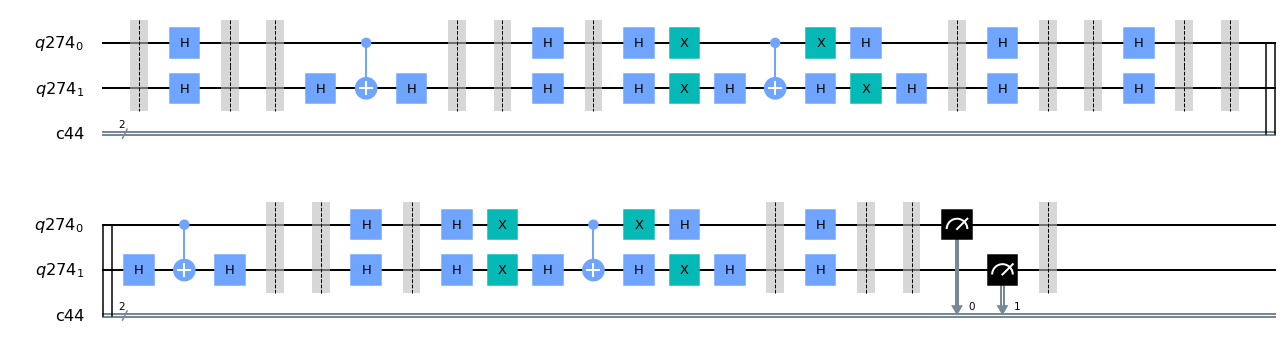

In [494]:
groverCircuit.draw("mpl")

In [495]:
# Now, let's execute the Quantum Circuit in the QASM Simulator of the Aer Module,
# of the IBM Qiskit Library
backend = Aer.get_backend('qasm_simulator')
counts = execute(groverCircuit,backend,shots=2048).result().get_counts()

In [496]:
# Print the Counts of the Frequencies, resulting from this Experiment
print(counts)

{'11': 2048}


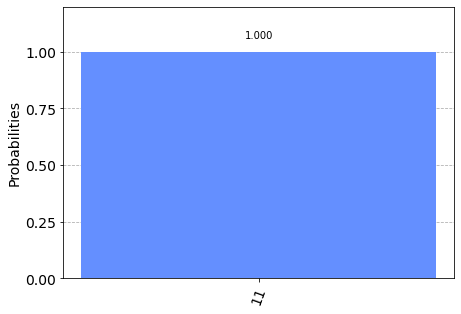

In [497]:
# Plot the Counts of the Frequencies, resulting from this Experiment, through a Histogram
# (i.e., a Distribution of the Probabilities)
plot_histogram(counts)

Now, let's try our [**Grover's Algorithm**]() for $ n = 3 $, i.e., $ 2^{3} = 8 $ possible **States**, taking $ \sqrt{8} = 3 $ **Steps**:

In [498]:
qr3 = QuantumRegister(3)
cr3 = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr3,cr3)

In [499]:
#element_3_states = [0,0,0]
#element_3_states = [0,0,1]
element_3_states = [0,1,0]
#element_3_states = [0,1,1]
#element_3_states = [1,0,0]
#element_3_states = [1,0,1]
#element_3_states = [1,1,0]
#element_3_states = [1,1,1]

In [500]:
element_3_states_binary = ''.join(map(str,element_3_states))

In [501]:
print("The Marked State, we're looking for, is: |{}⟩".format(element_3_states_binary))

The Marked State, we're looking for, is: |010⟩


In [502]:
element_3_states.reverse()

In [503]:
grover_algorithm(groverCircuit,qr3,cr3,element_3_states,3)

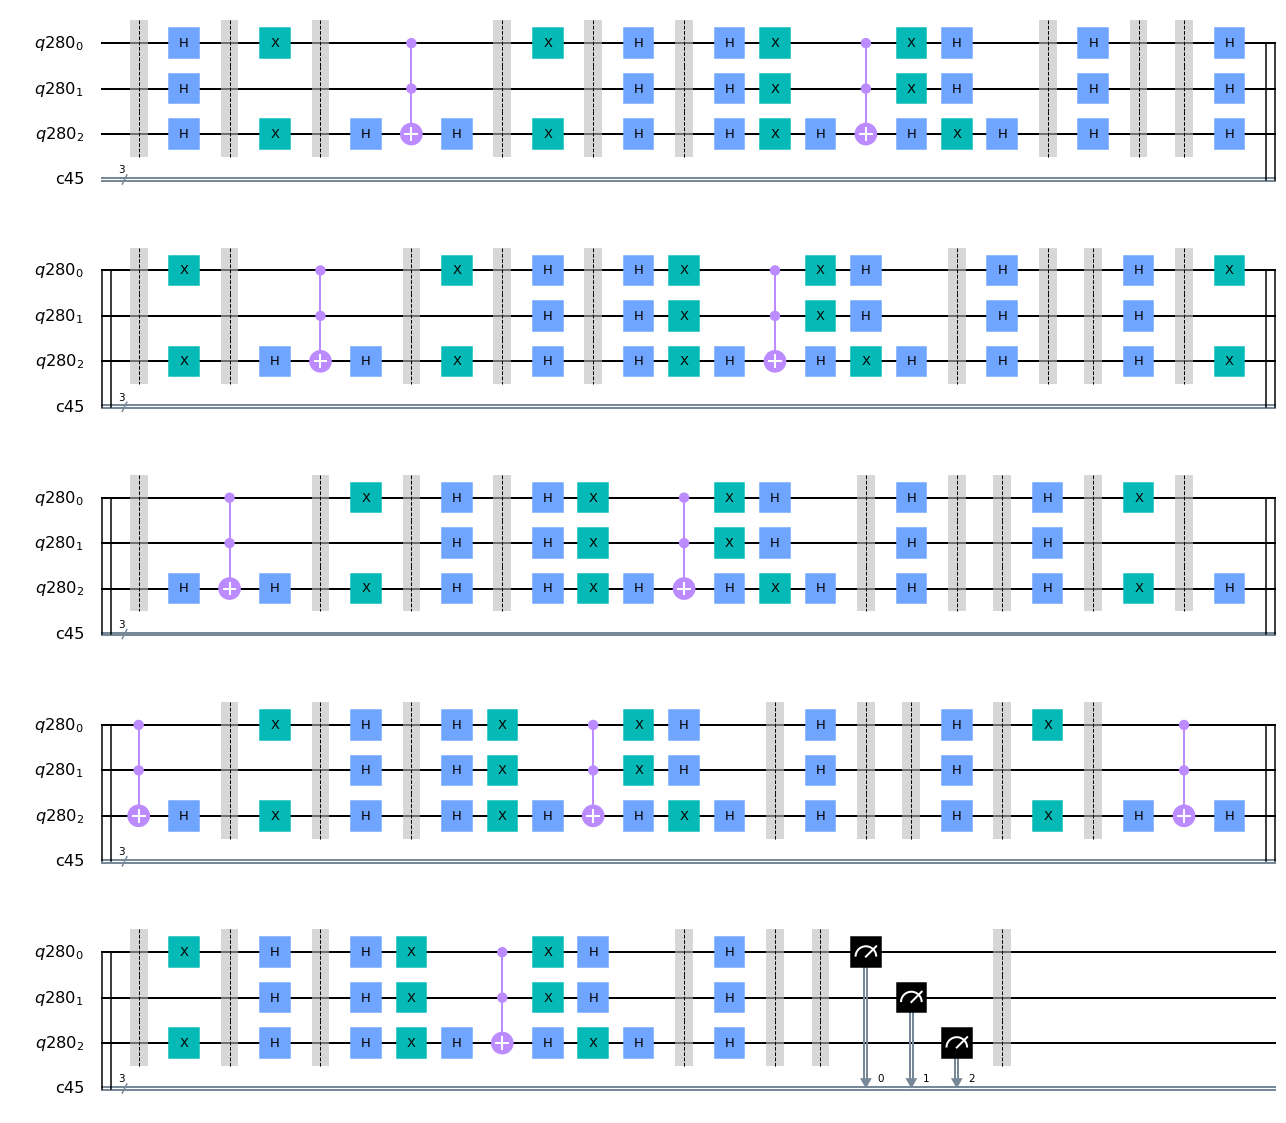

In [504]:
groverCircuit.draw("mpl")

In [505]:
# Now, let's execute the Quantum Circuit in the QASM Simulator of the Aer Module,
# of the IBM Qiskit Library
backend = Aer.get_backend('qasm_simulator')
counts = execute(groverCircuit,backend,shots=2048).result().get_counts()

In [506]:
# Print the Counts of the Frequencies, resulting from this Experiment
print(counts)

{'000': 241, '001': 267, '010': 284, '011': 246, '100': 235, '101': 253, '110': 261, '111': 261}


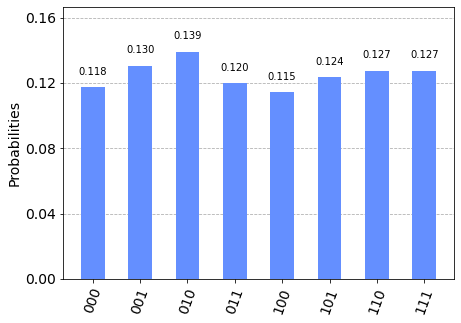

In [507]:
# Plot the Counts of the Frequencies, resulting from this Experiment, through a Histogram
# (i.e., a Distribution of the Probabilities)
plot_histogram(counts)

Finally, let's try our [**Grover's Algorithm**]() for $ n = 4 $, i.e., $ 2^{4} = 16 $ possible **States**, taking $ \sqrt{16} = 4 $ **Steps**:

In [508]:
qr4 = QuantumRegister(4)
cr4 = ClassicalRegister(4)

groverCircuit = QuantumCircuit(qr4,cr4)

In [518]:
#element_4_states = [0,0,0,0]
#element_4_states = [0,0,0,1]
#element_4_states = [0,0,1,0]
#element_4_states = [0,0,1,1]
#element_4_states = [0,1,0,0]
#element_4_states = [0,1,0,1]
#element_4_states = [0,1,1,0]
#element_4_states = [0,1,1,1]
#element_4_states = [1,0,0,0]
#element_4_states = [1,0,0,1]
#element_4_states = [1,0,1,0]
#element_4_states = [1,0,1,1]
#element_4_states = [1,1,0,0]
element_4_states = [1,1,0,1]
#element_4_states = [1,1,1,0]
#element_4_states = [1,1,1,1]

In [519]:
element_4_states_binary = ''.join(map(str,element_4_states))

In [520]:
print("The Marked State, we're looking for, is: |{}⟩".format(element_4_states_binary))

The Marked State, we're looking for, is: |1101⟩


In [521]:
element_4_states.reverse()

In [522]:
grover_algorithm(groverCircuit,qr4,cr4,element_4_states,4)

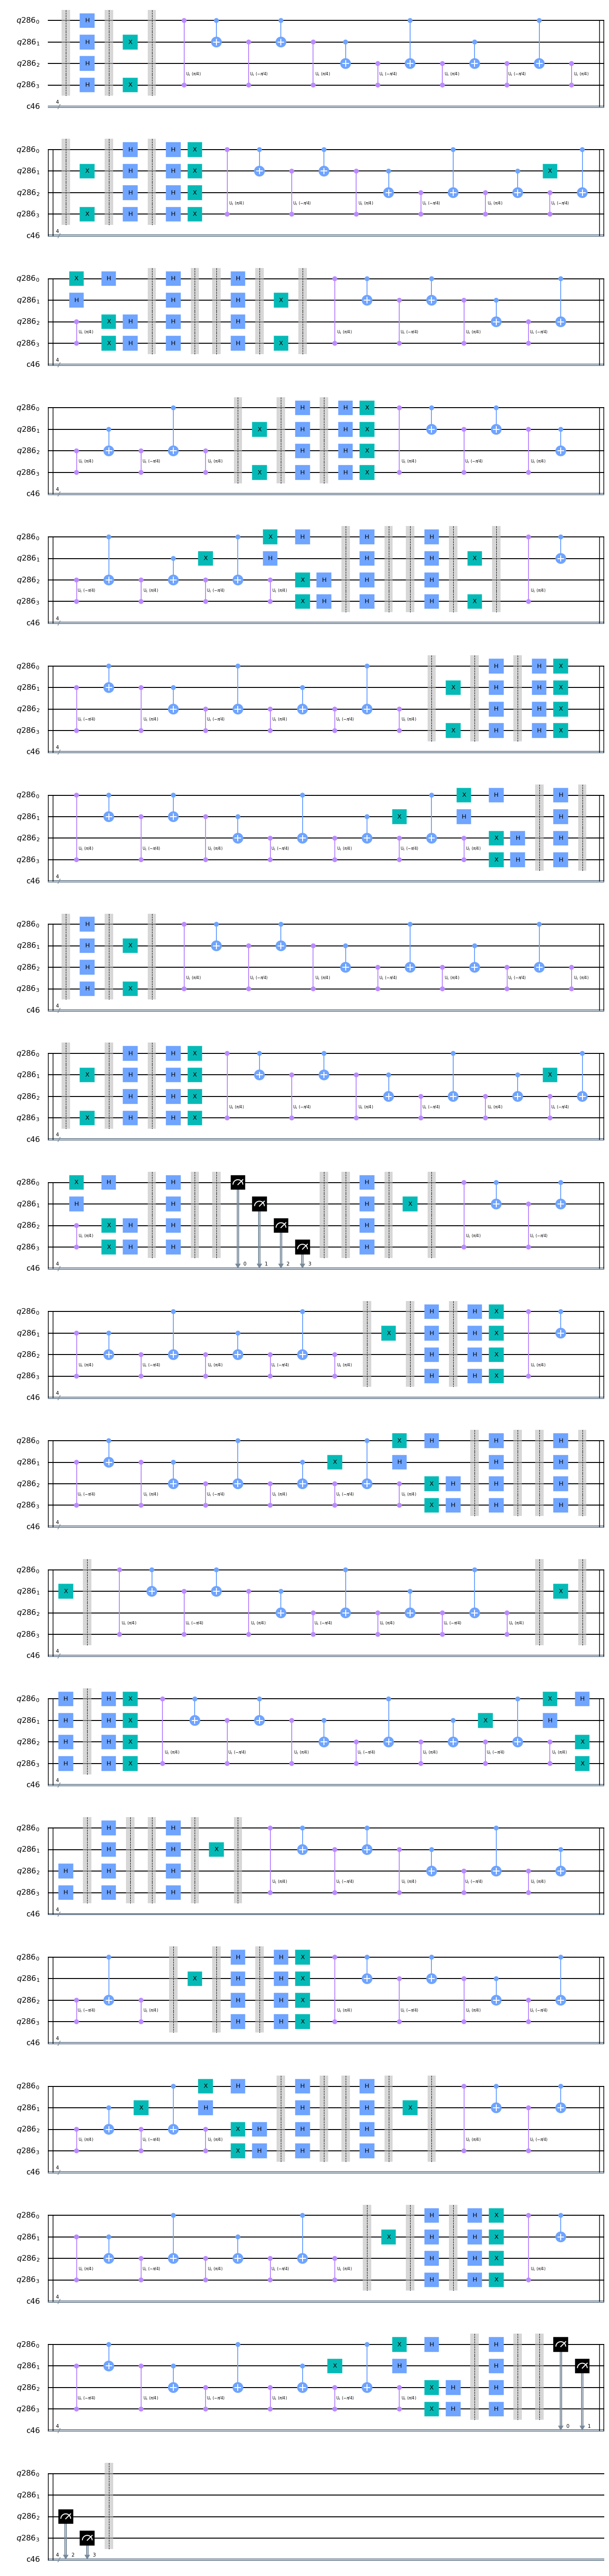

In [523]:
groverCircuit.draw("mpl")

In [524]:
# Now, let's execute the Quantum Circuit in the QASM Simulator of the Aer Module,
# of the IBM Qiskit Library
backend = Aer.get_backend('qasm_simulator')
counts = execute(groverCircuit,backend,shots=2048).result().get_counts()

In [525]:
# Print the Counts of the Frequencies, resulting from this Experiment
print(counts)

{'0000': 171, '0001': 27, '0010': 153, '0011': 25, '0100': 19, '0101': 882, '0110': 28, '0111': 127, '1000': 134, '1001': 35, '1010': 135, '1011': 42, '1100': 54, '1101': 50, '1110': 34, '1111': 132}


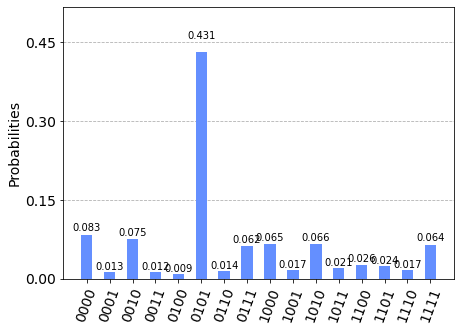

In [526]:
# Plot the Counts of the Frequencies, resulting from this Experiment, through a Histogram
# (i.e., a Distribution of the Probabilities)
plot_histogram(counts)

### **Exercise 4**

Explore aspects of the [**Grover's Algorithm**](https://en.wikipedia.org/wiki/Grover%27s_algorithm) such as the **efficiency** as a **function** of the **number of repetions**, $R$, or the number of measurements that you need to carry out to **measure** the **searched element**.

### **Conclusions**

<img src="https://raw.githubusercontent.com/rubenandrebarreiro/summer-school-on-quantum-computing-software-for-near-term-quantum-devices-2020/master/imgs/PNGs/grover-jump-high-1.png" alt="Grover from Sesame Street, jumping high" width="10%" align="left">

<br>

&nbsp;&nbsp;Like our buddy [**Grover**](), from [**Sesame Stree**]() says, in his **Fast Food Restaurant**:

&nbsp;&nbsp;- **_"Oh, it is fast, sir, believe me!!!"_**

<br>

&nbsp;&nbsp;Check the **YouTube Video** of [**Grover**]()'s **very funny way** of serving **Fast Food**, in a ***veryyyyy faaaaaaast fashion***:

&nbsp;&nbsp;- [**https://www.youtube.com/watch?v=uvM49lQYBNs**](https://www.youtube.com/watch?v=uvM49lQYBNs)


### **Credits**

<img src="https://www.ibm.com/blogs/research/wp-content/uploads/2018/05/qiskit.gif" alt="IBM Qiskit Logo - Animation" width="10%" align="left">

#### ***Thank you from your Qiskitters*** [**Gustavo del Val Garcia**](), [**Lucía Vílchez Estévez**](), [**María Hita Pérez**]() ***and*** [**Rúben André Barreiro**](mailto:ruben.andre.letra.barreito@gmail.com)***!!!***

In [529]:
# Print the current Qiskit's Modules' Version
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': None,
 'qiskit': '0.20.0'}